# Bootstrap Qumatum Mechanics - Solving QM without Schrodinger Equation

In [1]:
from Bootstrap import*
from sympy import Rational
from mpmath import mp
from numpy import array, inf, linspace
from tqdm import tqdm
import matplotlib.pyplot as plt
#%matplotlib inline

mp.dps = 100

## 1D Harmonic Oscillator

In [10]:
class SHO_Boostrap(Bootstrap):

    def __init__(self, E, Default_N=30):
        
        initial_conition = {0: 1, 2: E}
        self.SHO_recurrence = lambda s: ( (2 * (s - 1) * self.E * self.computed[s - 2] + Rational(1, 4) * (s - 1)*(s - 2)*(s - 3) * self.computed[s-4] )/(s) if (s >= 4 and s % 2 == 0) else  0 )
        self.matrix_el_fnc = lambda i, j: self.computed[i + j]
        super().__init__(E = E, Recurrence_Func = self.SHO_recurrence, Initial_conition = initial_conition, Matrix_el_Fnc = self.matrix_el_fnc, Default_N = Default_N)

In [ ]:
SHO_Scan = [Rational(i, 100) for i in range(1200)]
is_sho_eigen = []

for i, energy in tqdm(enumerate(SHO_Scan)):

    if i % 100 == 0:
        print( f'i = {i}, Current_Energy = {float(energy):.3f}, Number of 0: {is_sho_eigen.count(0)}, Number of 1: {is_sho_eigen.count(1)}' )  

    is_sho_eigen.append(SHO_Boostrap(energy, 70).is_Eigen(70))

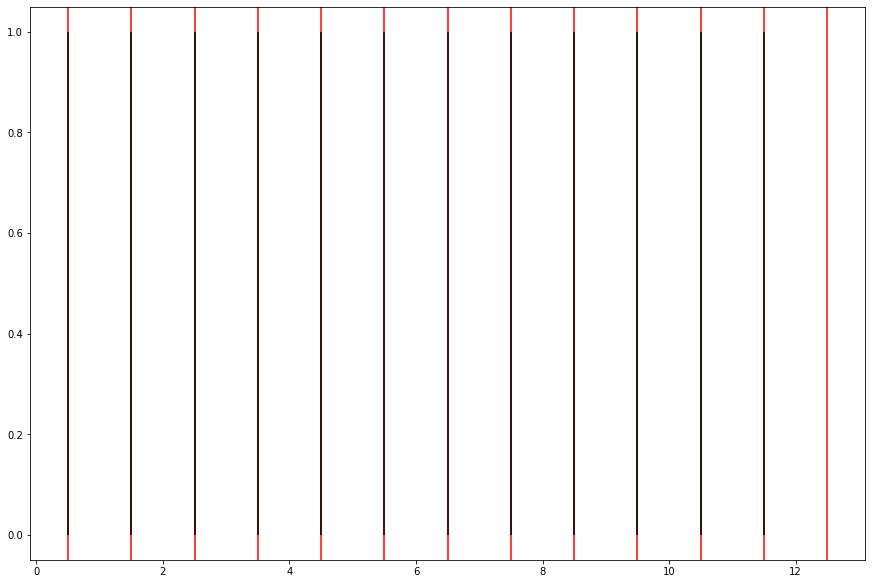

In [24]:
################################################################################
# Good Spectrum Form
################################################################################
sho_en = [ (n + 1/2) for n in range(0, 13)]
sho_bootstraped = []

for i, energy in enumerate(SHO_Scan):

    if is_sho_eigen[i] == 1:
        sho_bootstraped.append( float(energy) )


################################################################################
# Plot
################################################################################
fig, ax = plt.subplots(constrained_layout = True) 
fig.patch.set_facecolor('white')

ax.vlines(sho_en, -0.05, 1.05, 'red')
ax.vlines(sho_bootstraped, 0, 1, 'k')
ax.set_ylim(-0.05, 1.05)
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()


## Hydrogen Atom

In [2]:
class H_Atom_Boostrap(Bootstrap):

    def __init__(self, E, l, Default_N=30):
        
        self.l = l
        initial_conition = {-1: -2 * E, 0: 1}
        self.SHO_recurrence = lambda s: - ( s * ((s + 1) * (s - 1) - 4 * self.l * (self.l + 1)) * self.computed[s - 2] + 4 * (2*(s + 1) - 1) * self.computed[s - 1])/(8 * (s + 1) * self.E)
        self.matrix_el_fnc = lambda i, j: self.computed[i + j]/( self.computed[i + 1] * self.computed[j + 1])

        super().__init__(E = E, Recurrence_Func = self.SHO_recurrence, Initial_conition = initial_conition, Matrix_el_Fnc = self.matrix_el_fnc, Default_N = Default_N)


### l = 1

In [ ]:
En = [- Rational(15, 100) + i * Rational(1/10000) for i in range(1500)]
Is_Eig = []
for i, Energy in tqdm(enumerate(En)):
    
    if i % 100 == 0:
        print( f'i = {i}, Current_Energy = {float(Energy):.3f}, Number of 0: {Is_Eig.count(0)}, Number of 1: {Is_Eig.count(1)}' )  
    
    Is_Eig.append(H_Atom_Boostrap(Energy, 1, 50).is_Eigen(50))

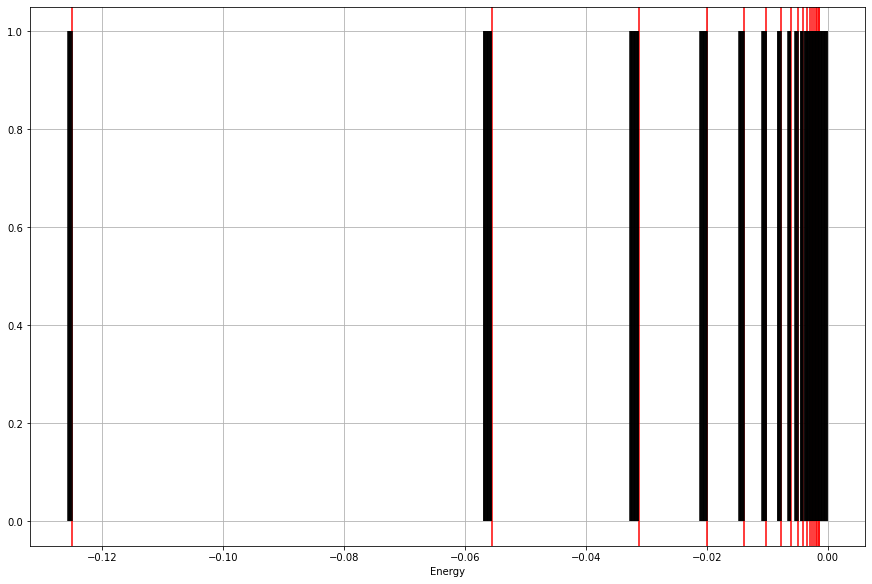

In [14]:
en = [ -1/(2 * n**2) for n in range(2, 20)]
bootstraped = []

for i, energy in enumerate(En):

    if Is_Eig[i] == 1:
        bootstraped.append( float(energy) )

fig, ax = plt.subplots(constrained_layout = True) 
fig.patch.set_facecolor('white')
ax.vlines(en, -0.05, 1.05, 'red')
ax.vlines(bootstraped, 0, 1, 'k')
ax.set_xlabel('Energy')
ax.grid(True)
ax.set_ylim(-0.05, 1.05)
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

In [ ]:
En = [- Rational(15, 100) + i * Rational(1/1000) for i in range(1500)]
Is_Eig = []
for i, Energy in tqdm(enumerate(En)):
    
    if i % 100 == 0:
        print( f'i = {i}, Current_Energy = {float(Energy):.3f}, Number of 0: {Is_Eig.count(0)}, Number of 1: {Is_Eig.count(1)}' )  
    
    Is_Eig.append(H_Atom_Boostrap(Energy, 2, 50).is_Eigen(50))

## Double Well

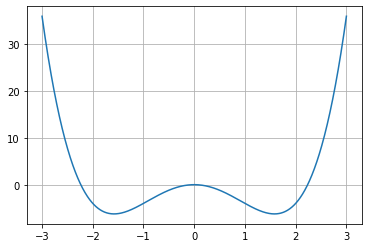

In [2]:
X = linspace(-3, 3, 1000)
Y = - 5 * X**2 + X**4

plt.plot(X, Y)
plt.grid(True)
plt.show()

In [3]:
class DW_Boostrap(Bootstrap):

    def __init__(self, E, x2, g, Default_N = 30):
        
        initial_conition = {0: 1, 2: x2, 4: (E - 2 * g * x2)/3}
        self.SHO_recurrence = lambda s: Rational(s - 3, s - 1) * E * self.computed[s - 4] - Rational(s - 2, s - 1) * g * self.computed[s - 2] + Rational((s - 3) * (s - 4) * (s - 5), 4 * (s - 1)) * self.computed[s - 6] if (s >= 6 and s%2 == 0) else 0
        self.matrix_el_fnc = lambda i, j: self.computed[i + j]
        super().__init__(E = E, Recurrence_Func = self.SHO_recurrence, Initial_conition = initial_conition, Matrix_el_Fnc = self.matrix_el_fnc, Default_N = Default_N)
    

    def is_Eigen_Multi_K(self, k_list, allowed = 1, not_allowed = 0):

        i = 1
        k_allowed = []
        k_list = sorted(k_list)

        while i <= k_list[-1]:
            
            tmp_minor = det(self.H[0: i, 0: i])
            
            if tmp_minor >= 0 and i in k_list:

                k_allowed.append(allowed)
                i += 1
                

            elif tmp_minor < 0:
                break
            
            else:
                i += 1
        
        return k_allowed + [not_allowed]*(len(k_list) - len(k_allowed))
                
                

### Single K

In [ ]:
En = [- 4 + i * Rational(1, 10) for i in range(141)]
x2 = [Rational(1, 2) + i * Rational(1, 100) for i in range(301)]
Is_Eig = []
for i, Energy in tqdm(enumerate(En)):

    if i % 20 == 0:
            print( f'i = {i}, Current_Energy = {float(Energy):.3f}, Number of 0: {Is_Eig.count(-inf)}, Number of 1: {Is_Eig.count(1)}' ) 

    for j, x2p in enumerate(x2):
        
        Is_Eig.append([Energy, x2p, DW_Boostrap(E = Energy, x2 = x2p, g = -5, Default_N = 15).is_Eigen(15, allowed = 1, not_allowed = -inf)])

Is_Eig = array(Is_Eig)

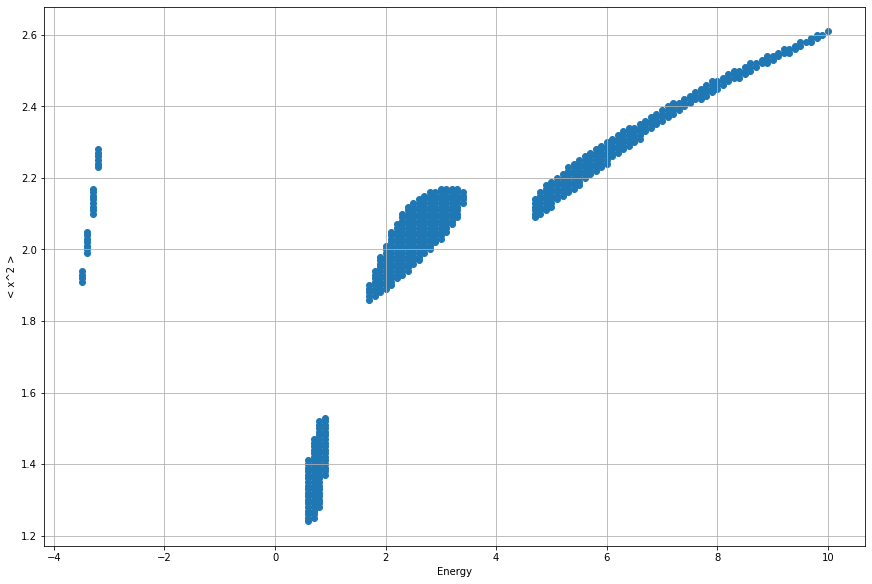

In [13]:
################################################################################
# Good Spectrum Form
################################################################################
allow_pts_dw = []

for pts in Is_Eig:

    if pts[2] == 1:
        allow_pts_dw.append([pts[0], pts[1]])

allow_pts_dw = array(allow_pts_dw).T


################################################################################
# Plot
################################################################################
fig, ax = plt.subplots(constrained_layout = True) 
fig.patch.set_facecolor('white')

ax.scatter(allow_pts_dw[0], allow_pts_dw[1])
ax.set_xlabel('Energy')
ax.set_ylabel('< x^2 >')
ax.grid(True)
plt.show()

### Multiple K

In [ ]:
En = [- 4 + i * Rational(1, 100) for i in range(1401)]
x2 = [Rational(1, 2) + i * Rational(1, 100) for i in range(301)]
scan_K = [8 + i for i in range(13)]
Is_Eig_2 = []
for i, Energy in tqdm(enumerate(En)):

    if i % 200 == 0:
            print( f'i = {i}, Current_Energy = {float(Energy):.3f}' ) 

    for j, x2p in enumerate(x2):
        
        Is_Eig_2.append([Energy, x2p, DW_Boostrap(E = Energy, x2 = x2p, g = -5, Default_N = 20).is_Eigen_Multi_K(scan_K)])

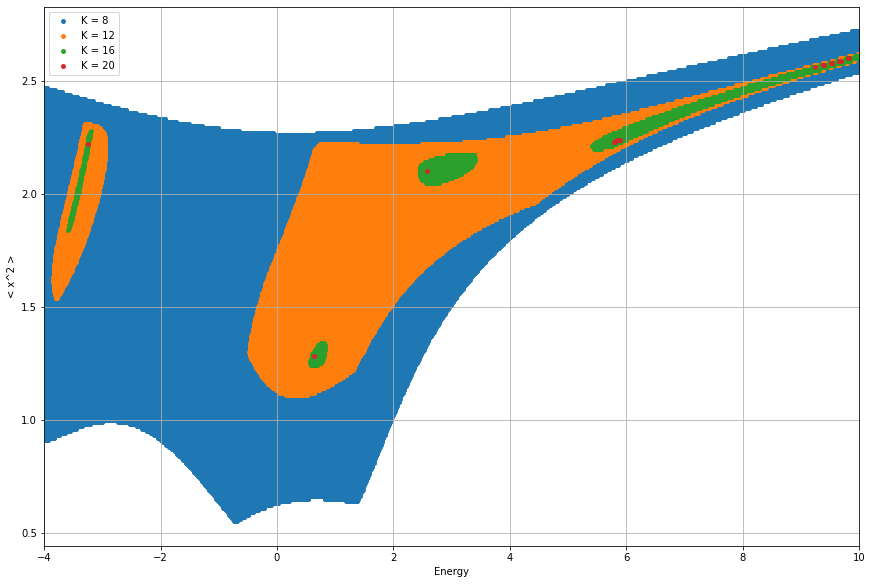

In [14]:
################################################################################
# Good Spectrum Form
################################################################################
Allowed_Energy = [[] for _ in range(len(Is_Eig_2[0][2]))]
K_list = [8 + i for i in range(13)]

for scanned in Is_Eig_2:

    for k, allow_en in enumerate(scanned[2]):
        
        if allow_en == 1: 
            Allowed_Energy[k].append([scanned[0], scanned[1]])

Allowed_Energy = list(map(array, Allowed_Energy))


################################################################################
# Plot
################################################################################
fig, ax = plt.subplots(constrained_layout = True) 
fig.patch.set_facecolor('white')

for i in range(0, len(Allowed_Energy), 4):
    ax.scatter(*(Allowed_Energy[i].T), 15, label = f'K = {K_list[i]}')

ax.set_xlabel('Energy')
ax.set_ylabel('< x^2 >')
ax.set_xlim(-4, 10)
ax.grid(True)
ax.legend()
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

## Energy Band

In [2]:
class EnergyBand_Boostrap(Bootstrap):

    def __init__(self, E, t1, Default_N = 30):
        
        alpha = 4
        initial_conition = {-2: ((1/4 - 2 * E) * t1 - alpha)/4/alpha, - 1: t1, 0: 1}
        self.recurrence = lambda n: ( (pow(n - 1, 3)/4 - 2 * (n - 1) * E) * self.computed[n-1] - alpha * (2*(n-1) - 1) * self.computed[n-2])/(alpha * (2*(n-1) + 1))
        self.matrix_el_fnc = lambda i, j: self.computed[abs(i - j)]

        super().__init__(E = E, Recurrence_Func = self.recurrence, Initial_conition = initial_conition, Matrix_el_Fnc = self.matrix_el_fnc, Default_N = Default_N)


In [ ]:
En = [- 10 + i * Rational(1, 100) for i in range(1801)]
t1 = [-1 + i * Rational(1, 10) for i in range(21)]
Is_Eig_2 = []
for i, Energy in tqdm(enumerate(En)):

    if i % 200 == 0:
            print( f'i = {i}, Current_Energy = {float(Energy):.3f}' ) 

    for j, x2p in enumerate(t1):
        
        Is_Eig_2.append([Energy, x2p, EnergyBand_Boostrap(E = Energy, t1 = x2p, Default_N = 15).is_Eigen(15)])

In [45]:
allow_pts_energy_band = []
for pts in Is_Eig_2:

    if pts[2] == 1:
        allow_pts_energy_band.append([pts[0], pts[1]])

allow_pts_energy_band = array(allow_pts_energy_band).T

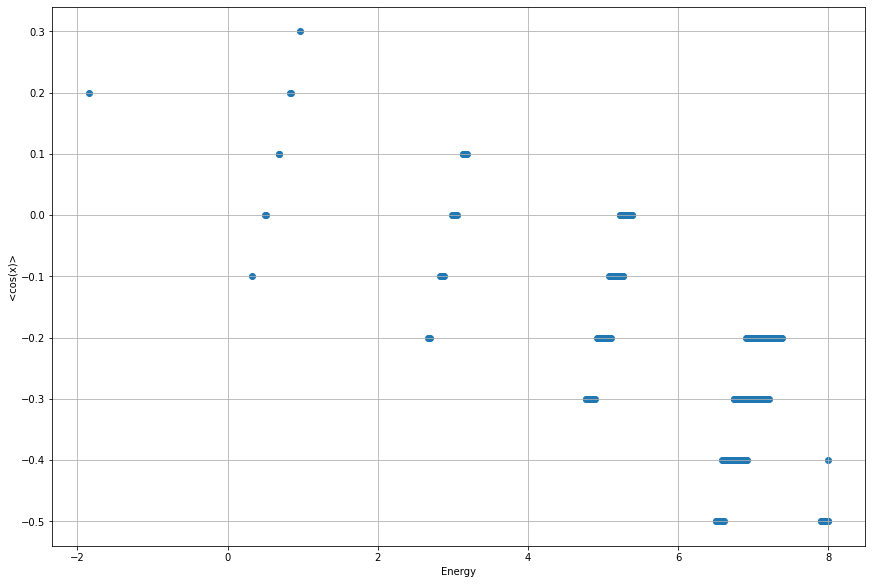

In [48]:
fig, ax = plt.subplots(constrained_layout = True) 
fig.patch.set_facecolor('white')

ax.scatter(allow_pts_energy_band[0], allow_pts_energy_band[1])
ax.set_xlabel('Energy')
ax.set_ylabel('<cos(x)>')
ax.grid(True)
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

In [ ]:
En = [- 10 + i * Rational(1, 10) for i in range(1801)]
t1 = [-1 + i * Rational(1, 10) for i in range(201)]
scan_K = [i for i in range(9, 15)]
Is_Eig_multi_K = []
for i, Energy in tqdm(enumerate(En)):

    if i % 200 == 0:
            print( f'i = {i}, Current_Energy = {float(Energy):.3f}' ) 

    for j, t1p in enumerate(t1):
        
        Is_Eig_multi_K.append([Energy, t1p, EnergyBand_Boostrap(E = Energy, t1 = t1p, Default_N = 15).is_Eigen_Multi_K(scan_K)])

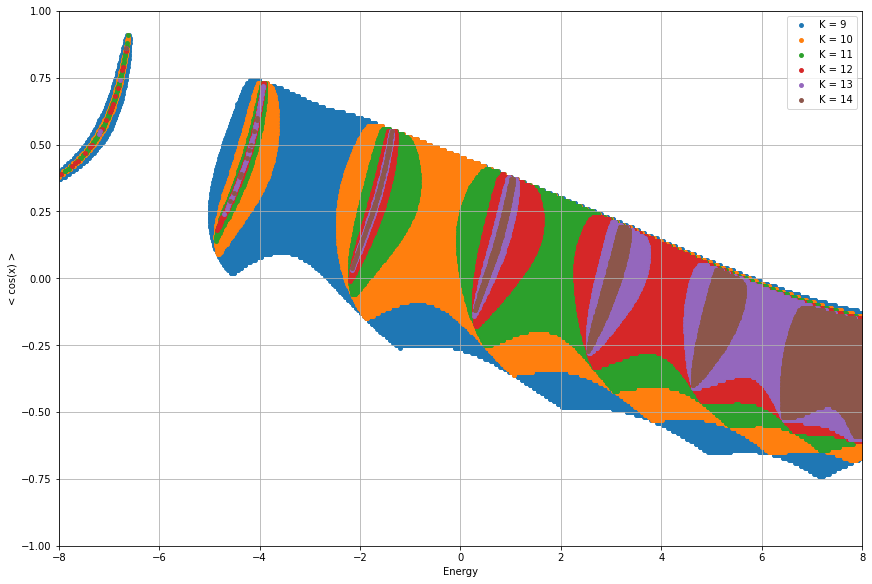

In [ ]:
################################################################################
# Good Spectrum Form
################################################################################
Allowed_Energy = [[] for _ in range(len(Is_Eig_multi_K[0][2]))]
K_list = [i for i in range(9, 15)]

for scanned in Is_Eig_multi_K:

    for k, allow_en in enumerate(scanned[2]):
        
        if allow_en == 1: 
            Allowed_Energy[k].append([scanned[0], scanned[1]])

Allowed_Energy = list(map(array, Allowed_Energy))


################################################################################
# Plot
################################################################################
fig, ax = plt.subplots(constrained_layout = True) 
fig.patch.set_facecolor('white')


for i in range(0, len(Allowed_Energy)):
    ax.scatter(*(Allowed_Energy[i].T), 15, label = f'K = {K_list[i]}')

ax.set_xlabel('Energy')
ax.set_ylabel('< cos(x) >')
ax.set_xlim(-8, 8)
ax.set_ylim(-1, 1)
ax.grid(True)
ax.legend()
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()